In [23]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('dados_cerveja_nota.xlsx')

In [4]:
df.head()

,id,cerveja,nota
0,1,1,0.75
1,2,1,3.00
2,3,2,1.75
3,4,3,1.75
4,5,4,4.20


In [11]:
X = df[['cerveja']]

In [6]:
y = df['nota']

In [16]:
reg = linear_model.LinearRegression() #Modelo ajustado

In [17]:
reg.fit(X, y) # Aprendizado de máquina

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
a, b = reg.intercept_, reg.coef_[0]

In [33]:
a, b

(np.float64(0.15161290322580534), np.float64(1.0362903225806452))

In [20]:
predict = reg.predict(X.drop_duplicates()) # Predição em cima dos dados unicos

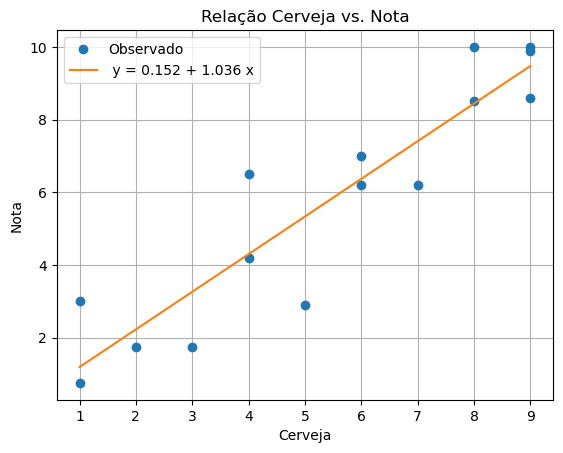

In [37]:
plt.plot(X['cerveja'], y, 'o')
plt.grid(True)
plt.title('Relação Cerveja vs. Nota')
plt.xlabel('Cerveja')
plt.ylabel('Nota')
plt.plot(X.drop_duplicates()['cerveja'], predict)
# Plotagem de pontos e predição

plt.legend(['Observado', f' y = {a:.3f} + {b:.3f} x'])